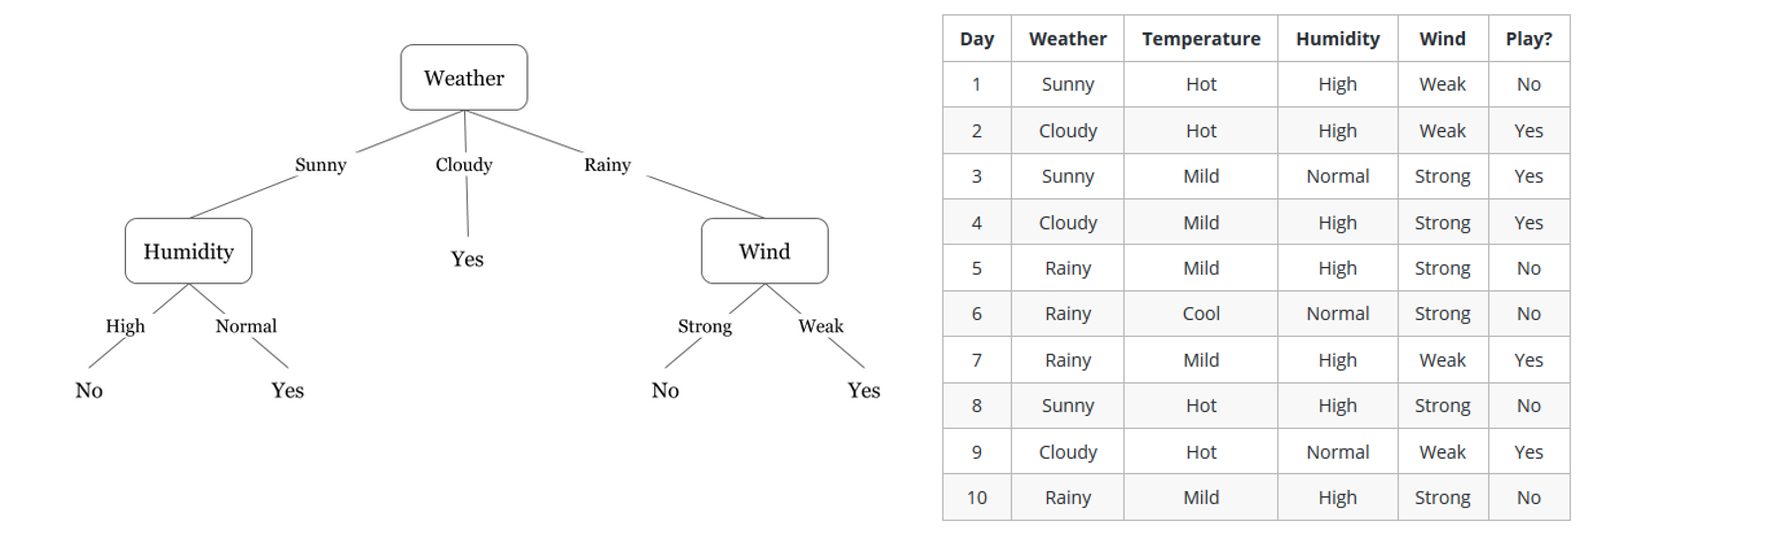

## Decision Trees
Decision Tree is a flowchart-like structure in which each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

The topmost node in a decision tree is the root node.

Decision nodes (internal nodes) are the nodes which have two or more branches.

Leaf nodes (terminal nodes) are the nodes which do not have any branches.

Select the best attribute using Attribute Selection Measures(ASM) to split the records.

Make that attribute a decision node and breaks the dataset into smaller subsets.

Starts tree building by repeating this process recursively for each child until one of the condition will match:

All the tuples belong to the same attribute value.
There are no more remaining attributes.
There are no more instances.

#### Decision Tree Cost Function

1. **Gini Impurity**
   - **How It Helps:** Gini impurity measures how mixed up your decisions are when you split based on a weather factor like temperature or humidity. It helps you pick the split that makes your decision groups (like playing outside or not) as clear and consistent as possible.
   - **Formula:** $Gini = 1 - \sum_{i=1}^{n} p_i^2$  
     where $p_i$ is the proportion of days with specific weather conditions where you either do or don't play outside.

2. **Entropy (Information Gain)**
   - **How It Helps:** Entropy measures the uncertainty in your decision based on a weather factor. Information gain helps you choose the split that makes your decision (to play or not) more predictable and less chaotic.
   - **Formula:** $Entropy = - \sum_{i=1}^{n} p_i \log_2(p_i)$  
     where $p_i$ is the probability of making a certain decision (like playing outside) based on specific weather conditions.

In [81]:
1 - ((1/3)**2 + (2/3)**2)
1 - ((3/3)**2 + 0)
1 - ((1/4)**2 + (3/4)**2)

0.375

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
# help(DecisionTreeClassifier)

Confusion Matrix:
 [[60  3]
 [10 98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90        63
           1       0.97      0.91      0.94       108

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171

ROC-AUC Score:  0.9298941798941799


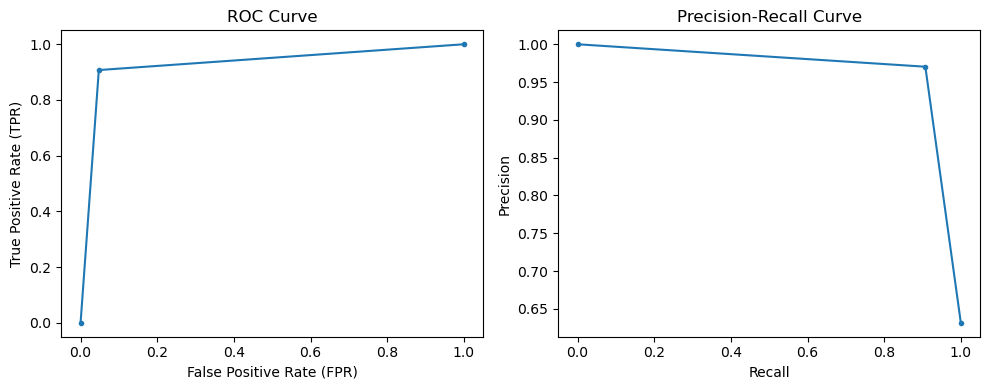

In [86]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

evaluate_classification(y_test, y_pred, y_prob)


Confusion Matrix:
 [[149   0]
 [  0 249]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       249

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

ROC-AUC Score:  1.0


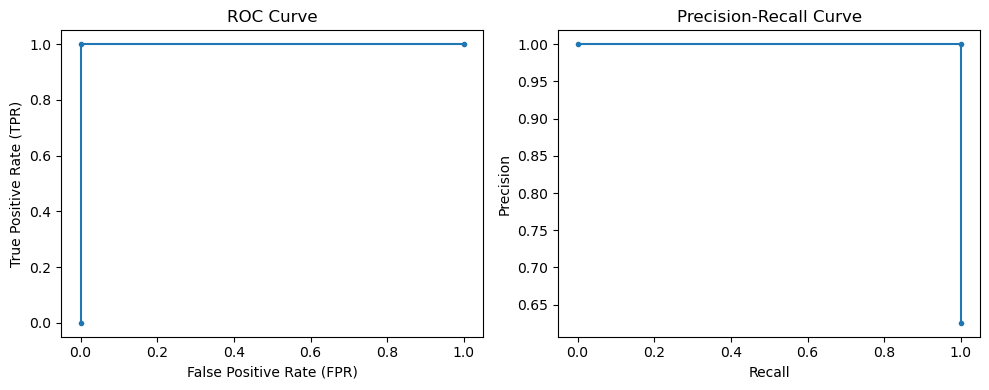

In [87]:
y_pred_train = model.predict(X_train)
y_prob_train = model.predict_proba(X_train)[:,1]
evaluate_classification(y_train, y_pred_train, y_prob_train)

In [129]:
# Test Accuracy, 0.92
# Train Accuracy, 1.0
model = DecisionTreeClassifier(max_depth=4, max_features=None, min_impurity_decrease=0.01, max_leaf_nodes=3,random_state=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Test Accuracy")
print(accuracy_score(y_test, y_pred))

y_pred_train = model.predict(X_train)
y_prob_train = model.predict_proba(X_train)[:,1]
print("\nTrain Accuracy")
print(accuracy_score(y_train, y_pred_train))

Test Accuracy
0.9473684210526315

Train Accuracy
0.9522613065326633


In [133]:
# data

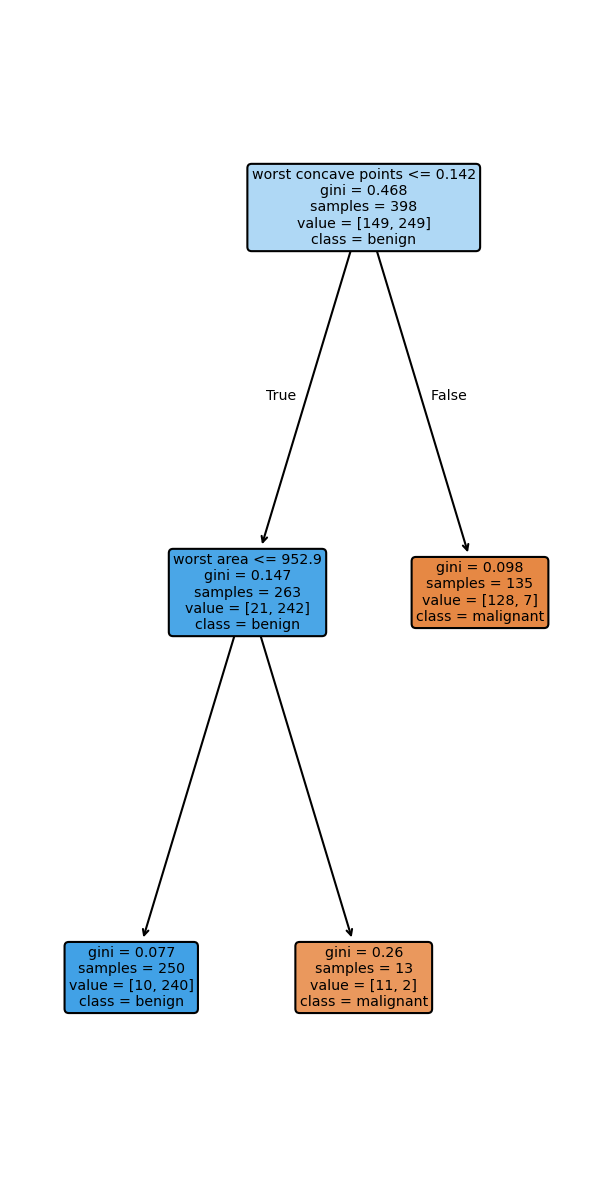

In [139]:
## plotting decision tree
from sklearn.tree import plot_tree

model = DecisionTreeClassifier(max_depth=4, max_features=None, min_impurity_decrease=0.01, max_leaf_nodes=3,random_state=0)
model.fit(X_train, y_train)

plt.figure(figsize=(5,10), dpi=150)
plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
plt.show()


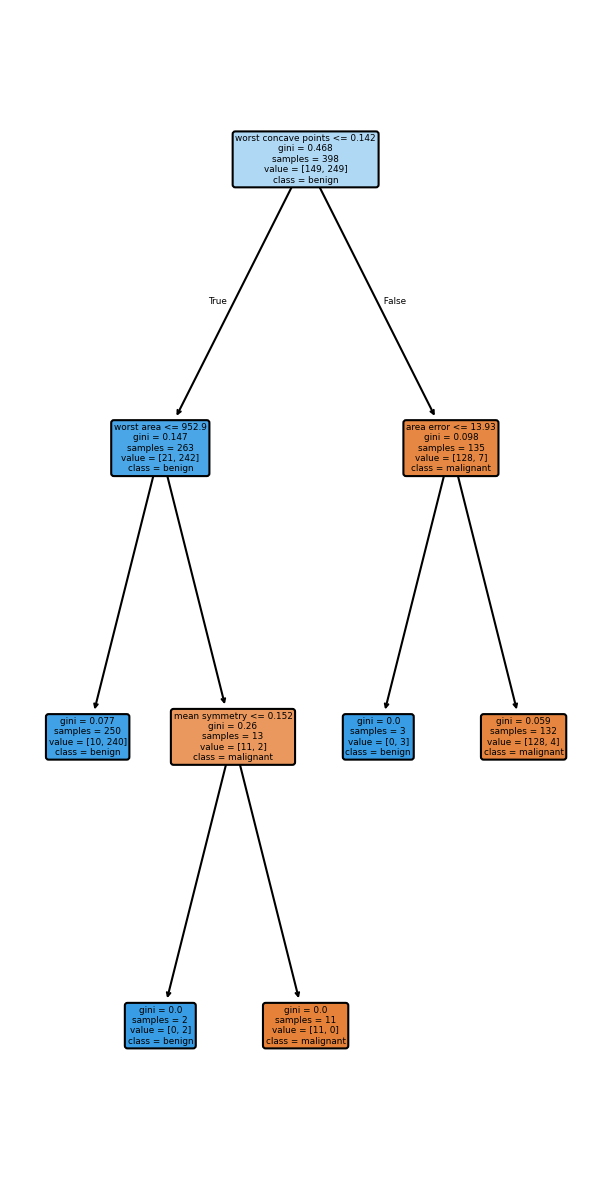

In [146]:
## plotting decision tree
from sklearn.tree import plot_tree

model = DecisionTreeClassifier(max_depth=10, max_features=None, min_impurity_decrease=0, max_leaf_nodes=5,random_state=0)
model.fit(X_train, y_train)

plt.figure(figsize=(5,10), dpi=150)
plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
plt.show()

In [140]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## **Random Forest**
- **Random Forest**: An ensemble learning method that builds multiple decision trees and merges them together to get a more accurate and stable prediction.
- **Bagging (Bootstrap Aggregating)**: A technique used to reduce the variance of a model by training multiple models on different random subsets of the data and combining their predictions.
- **Random Forest Algorithm**:
    1. Randomly select $k$ features from total $m$ features.
    2. Among the $k$ features, calculate the node $d$ using the best split point.
    3. Split the node into child nodes using the best split.
    4. Repeat steps 1 to 3 until the tree is fully grown.
    5. Build multiple trees to form a forest.
    6. Predict the final output by taking the majority vote.

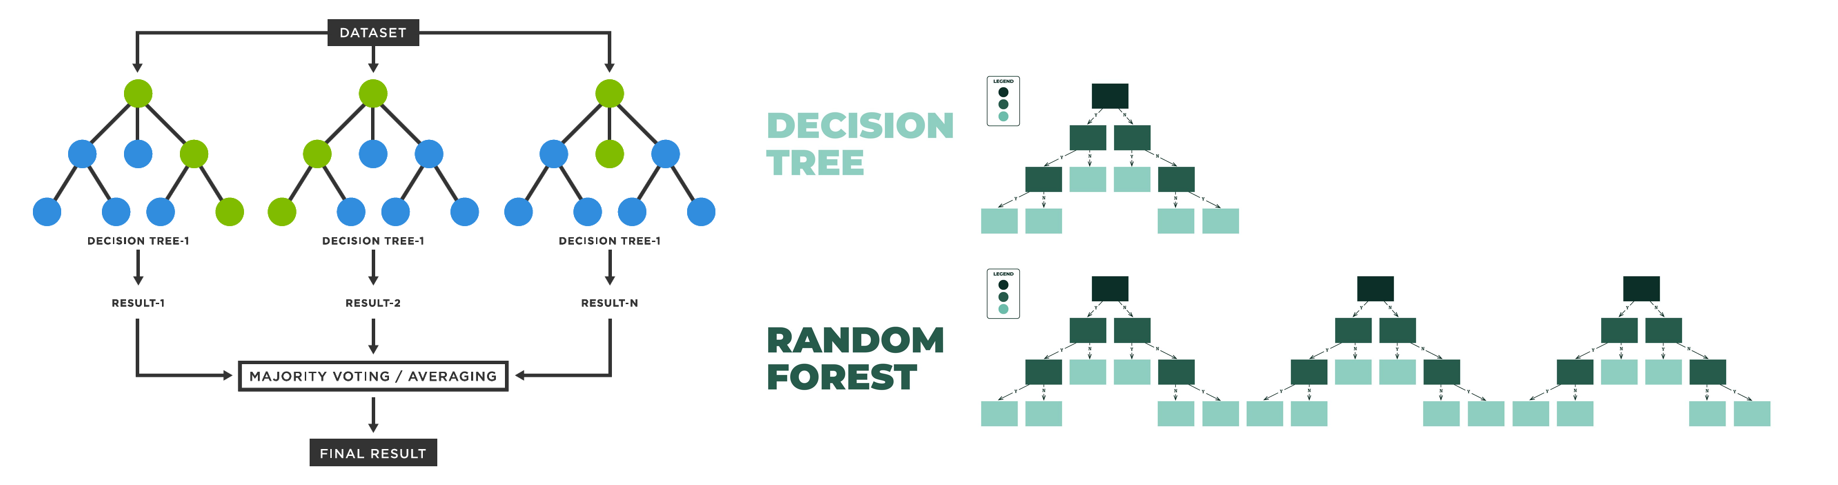

#### Random Forest Cost Function
- Same as Decision Tree Cost Function (Gini Impurity, Entropy)

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
# help(RandomForestClassifier)

In [157]:
# model = RandomForestClassifier(max_depth=4, max_features=None, min_impurity_decrease=0.01, max_leaf_nodes=3,random_state=0)

model = RandomForestClassifier(random_state=0, n_estimators=1000, n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Test Accuracy")
print(accuracy_score(y_test, y_pred))

y_pred_train = model.predict(X_train)
y_prob_train = model.predict_proba(X_train)[:,1]
print("\nTrain Accuracy")
print(accuracy_score(y_train, y_pred_train))

Test Accuracy
0.9649122807017544

Train Accuracy
1.0


In [171]:

model = RandomForestClassifier(random_state=42, n_estimators=1000, n_jobs=-1, max_depth=5)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Test Accuracy")
print(accuracy_score(y_test, y_pred))

y_pred_train = model.predict(X_train)
y_prob_train = model.predict_proba(X_train)[:,1]
print("\nTrain Accuracy")
print(accuracy_score(y_train, y_pred_train))

Test Accuracy
0.9649122807017544

Train Accuracy
0.992462311557789
